# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Download this notebook for our code-along:

From our class GitHub repository "notebooks" directory, download the file "02_numpy_and_pandas.ipynb".  Move this to a convenient place where you are grouping your class related materials.


# Introduction to Numpy ("num-pi")

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data?
    * It makes our data science life easier!!
        * Numpy brings *decades* of C math into Python!
        * Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
        * NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [2]:
## from numpy import * #Load all the numpy packages
%matplotlib inline
import numpy as np



### A Note About "import as"

    import * 
This loads all submodules. Note: this is a waste of memory when incorporated into deployed code. 
We'll use it here by example - it's fine to use for learning purposes and legibility.

As we'll see later, the proper convention is to use:

    import numpy as np
    
And then to specifically call needed methods:

![](http://note.io/1juA60F)

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [3]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [4]:
# Note the way each array is printed:
print("a: ",a)
print("b: ",b)
print("c: ",c)
print("d: ",d)

('a: ', array([ 0.,  0.,  0.]))
('b: ', array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]]))
('c: ', array([[[5, 8, 6, 4],
        [3, 4, 5, 5],
        [3, 7, 3, 6]],

       [[2, 1, 4, 7],
        [2, 8, 1, 9],
        [6, 4, 4, 6]]]))
('d: ', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


In [5]:
## Arithmetic in arrays is element wise

In [6]:
>>> a = np.array( [20,30,40,50] )
>>> b = np.arange( 4 )
>>> b

array([0, 1, 2, 3])

In [7]:
>>> c = a-b
>>> c

array([20, 29, 38, 47])

In [8]:
>>> b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [9]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [10]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [11]:
a[2:5]

array([ 4,  9, 16])

In [12]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [13]:
b = np.random.randint(1,100,(4,4))

In [14]:
b

array([[78, 50, 38, 58],
       [52, 51, 46, 75],
       [15, 51,  5, 28],
       [68, 93, 68, 87]])

In [15]:
# Guess the output
print(b[2,3])


28


In [16]:
# Guess the output
print(b[0,0])


78


In [17]:
# Guess the output
b[0:3,1]

array([50, 51, 51])

In [18]:
#Guess the output
b[:,1]

array([50, 51, 51, 93])

In [19]:
#Guess the output
b[1:3,:]

array([[52, 51, 46, 75],
       [15, 51,  5, 28]])

# Introduction to Pandas

**Pandas, Know it! Love it! We will use it extensively.**

Will allow us to use short lines of code to do important manipulation and viewing of our data
* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [23]:
# Index, columns, underlying numpy data
df

,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901


In [24]:

df.T


,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,-1.852417,0.493560,-0.616204,1.495474,0.087313,0.558734
B,-0.064400,1.292923,0.725380,-0.529946,-0.146817,-0.293773
C,-0.864159,0.442482,0.053441,-0.700288,0.954461,-0.621983
D,-0.146882,-1.852307,0.509120,0.534279,-0.907806,-1.414901


In [25]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1,2013-01-02,1,3,foo
1,1,2013-01-02,1,3,foo
2,1,2013-01-02,1,3,foo
3,1,2013-01-02,1,3,foo


In [26]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [27]:
df

,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901


In [28]:
df.head()


,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806


In [29]:
df.tail()

,A,B,C,D
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901


In [30]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.027743,0.163895,-0.122674,-0.546416
std,1.149468,0.697066,0.727102,1.003186
min,-1.852417,-0.529946,-0.864159,-1.852307
25%,-0.440325,-0.257034,-0.680712,-1.288127
50%,0.290436,-0.105609,-0.284271,-0.527344
75%,0.542441,0.527935,0.345222,0.345119
max,1.495474,1.292923,0.954461,0.534279


In [32]:
df.sort(columns='B')
df

/Users/jim_byers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901


### Selection

In [33]:
df[['A','B']]

,A,B
2014-01-01,-1.852417,-0.064400
2014-01-02,0.493560,1.292923
2014-01-03,-0.616204,0.725380
2014-01-04,1.495474,-0.529946
2014-01-05,0.087313,-0.146817
2014-01-06,0.558734,-0.293773


In [34]:
df[0:3]

,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120


In [35]:
# By label
df.loc[dates[0]]

A   -1.852417
B   -0.064400
C   -0.864159
D   -0.146882
Name: 2014-01-01 00:00:00, dtype: float64

In [36]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,-1.852417,-0.064400
2014-01-02,0.493560,1.292923
2014-01-03,-0.616204,0.725380
2014-01-04,1.495474,-0.529946
2014-01-05,0.087313,-0.146817
2014-01-06,0.558734,-0.293773


In [37]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,1.292923
2014-01-03,0.725380
2014-01-04,-0.529946


In [38]:
# Fast access to scalar
df.at[dates[1],'B']

1.2929234858887562

### Operations

In [39]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.027743,0.163895,-0.122674,-0.546416
std,1.149468,0.697066,0.727102,1.003186
min,-1.852417,-0.529946,-0.864159,-1.852307
25%,-0.440325,-0.257034,-0.680712,-1.288127
50%,0.290436,-0.105609,-0.284271,-0.527344
75%,0.542441,0.527935,0.345222,0.345119
max,1.495474,1.292923,0.954461,0.534279


In [40]:
df.mean(),df.mean(1) # Operation on two different axes

(A    0.027743
 B    0.163895
 C   -0.122674
 D   -0.546416
 dtype: float64, 2014-01-01   -0.731965
 2014-01-02    0.094165
 2014-01-03    0.167934
 2014-01-04    0.199880
 2014-01-05   -0.003212
 2014-01-06   -0.442981
 Freq: D, dtype: float64)

### Boolean Indexing

In [41]:
df

,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901


In [42]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-1.852417,-0.06440,-0.864159,-0.146882
2014-01-03,-0.616204,0.72538,0.053441,0.509120


In [43]:
df.A < 0

2014-01-01     True
2014-01-02    False
2014-01-03     True
2014-01-04    False
2014-01-05    False
2014-01-06    False
Freq: D, Name: A, dtype: bool

In [44]:
# Two conditions added together
df[(df.A < 0) & (df.B > .5) ]

,A,B,C,D
2014-01-03,-0.616204,0.72538,0.053441,0.50912


In [45]:
# Two conditions ORed together
df[(df.A < -1) | (df.D > 0)]

,A,B,C,D
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882
2014-01-03,-0.616204,0.725380,0.053441,0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279


### Merge

In [46]:
np.random.randn(10,4)

array([[ 1.04395911, -1.47305205, -0.23126949, -1.11665082],
       [ 0.9447397 , -0.60450232,  0.55677749, -0.77687019],
       [ 0.08640536,  0.42821086, -0.02543862, -0.65067117],
       [ 1.1729843 ,  1.49750043,  1.70720118, -3.78520453],
       [-0.28600257,  0.23568711, -1.53532043, -1.00410235],
       [-0.38195294, -0.42503652, -1.46167607,  0.09055646],
       [ 1.77305363, -0.70536741,  1.43643196,  1.41475157],
       [ 1.32074725,  0.34090157,  1.50595862, -0.56409384],
       [-1.78048411, -0.52681978,  1.89095182, -0.78942382],
       [ 0.2513967 ,  0.16786423, -1.83040754, -0.28591861]])

In [47]:
#Concatenating pandas objects together
df2 = pd.DataFrame(np.random.randn(10,4))
df2

,0,1,2,3
0,0.715391,-0.615844,1.035251,0.748857
1,0.645622,0.368765,-1.258206,0.191632
2,1.147788,0.317607,-1.965764,-0.124198
3,-1.595805,-0.402327,0.260561,-0.425883
4,0.862880,0.772479,-0.187875,0.726583
5,0.359919,-0.773547,-0.928463,-0.454038
6,-0.633747,-1.159134,1.301220,-0.542743
7,1.544222,-0.714093,0.006704,2.144965
8,-1.304869,0.256355,-1.386836,0.639978
9,0.355813,-0.738924,0.357239,0.921883


In [48]:
# Break it into pieces
pieces = [df2[:3], df2[3:7],df2[7:]]
pieces

[          0         1         2         3
 0  0.715391 -0.615844  1.035251  0.748857
 1  0.645622  0.368765 -1.258206  0.191632
 2  1.147788  0.317607 -1.965764 -0.124198,
           0         1         2         3
 3 -1.595805 -0.402327  0.260561 -0.425883
 4  0.862880  0.772479 -0.187875  0.726583
 5  0.359919 -0.773547 -0.928463 -0.454038
 6 -0.633747 -1.159134  1.301220 -0.542743,
           0         1         2         3
 7  1.544222 -0.714093  0.006704  2.144965
 8 -1.304869  0.256355 -1.386836  0.639978
 9  0.355813 -0.738924  0.357239  0.921883]

In [49]:
pd.concat(pieces)

,0,1,2,3
0,0.715391,-0.615844,1.035251,0.748857
1,0.645622,0.368765,-1.258206,0.191632
2,1.147788,0.317607,-1.965764,-0.124198
3,-1.595805,-0.402327,0.260561,-0.425883
4,0.862880,0.772479,-0.187875,0.726583
5,0.359919,-0.773547,-0.928463,-0.454038
6,-0.633747,-1.159134,1.301220,-0.542743
7,1.544222,-0.714093,0.006704,2.144965
8,-1.304869,0.256355,-1.386836,0.639978
9,0.355813,-0.738924,0.357239,0.921883


In [50]:
# Also can "Join" and "Append"

### Setting

In [51]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [52]:
df_posA

,A,B,C,D
2014-01-01,1.852417,0.064400,0.864159,0.146882
2014-01-02,0.493560,1.292923,0.442482,-1.852307
2014-01-03,0.616204,-0.725380,-0.053441,-0.509120
2014-01-04,1.495474,-0.529946,-0.700288,0.534279
2014-01-05,0.087313,-0.146817,0.954461,-0.907806
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901


In [53]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [54]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [55]:
df['F'] = s1

In [56]:
df

,A,B,C,D,F
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882,NaN
2014-01-02,0.493560,1.292923,0.442482,-1.852307,1
2014-01-03,-0.616204,0.725380,0.053441,0.509120,2
2014-01-04,1.495474,-0.529946,-0.700288,0.534279,3
2014-01-05,0.087313,-0.146817,0.954461,-0.907806,4
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901,5


### Missing Data

In [57]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [58]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [59]:
df1

,A,B,C,D,F,E
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882,NaN,1
2014-01-02,0.493560,1.292923,0.442482,-1.852307,1,1
2014-01-03,-0.616204,0.725380,0.053441,0.509120,2,NaN
2014-01-04,1.495474,-0.529946,-0.700288,0.534279,3,NaN


In [60]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Applying functions

In [61]:
df

,A,B,C,D,F
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882,NaN
2014-01-02,0.493560,1.292923,0.442482,-1.852307,1
2014-01-03,-0.616204,0.725380,0.053441,0.509120,2
2014-01-04,1.495474,-0.529946,-0.700288,0.534279,3
2014-01-05,0.087313,-0.146817,0.954461,-0.907806,4
2014-01-06,0.558734,-0.293773,-0.621983,-1.414901,5


In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-1.852417,-0.064400,-0.864159,-0.146882,NaN
2014-01-02,-1.358857,1.228523,-0.421677,-1.999190,1
2014-01-03,-1.975061,1.953903,-0.368236,-1.490070,3
2014-01-04,-0.479587,1.423957,-1.068524,-0.955791,6
2014-01-05,-0.392274,1.277140,-0.114063,-1.863597,10
2014-01-06,0.166460,0.983367,-0.736046,-3.278498,15


In [63]:
df.apply(lambda x: x.max() - x.min())

A    3.347891
B    1.822870
C    1.818620
D    2.386586
F    4.000000
dtype: float64

In [64]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Grouping


In [65]:
df3 = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [66]:
df3

,A,B,C,D
0,foo,one,-1.019653,0.155704
1,bar,one,1.036166,-1.198918
2,foo,two,0.203702,0.444151
3,bar,three,0.480536,1.792000
4,foo,two,-2.377876,0.582398
5,bar,two,0.833833,-0.162423
6,foo,one,0.106570,-0.319444
7,foo,three,-1.510930,-0.445471


In [67]:
df3.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.036166 -1.198918
    three  0.480536  1.792000
    two    0.833833 -0.162423
foo one   -0.913084 -0.163740
    three -1.510930 -0.445471
    two   -2.174174  1.026549

### Reshaping

In [68]:
# You can also stack or unstack levels

In [69]:
a = df3.groupby(['A','B']).sum()

In [70]:
# Pivot Tables
# pd.pivot_table(df3,values=['C','D'],rows=['A'],cols=['B'])

### Time Series


In [71]:
import pandas as pd
import numpy as np

In [72]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [73]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [74]:
ts

2014-01-01 00:00:00    146
2014-01-01 00:00:01     69
2014-01-01 00:00:02    499
2014-01-01 00:00:03    356
2014-01-01 00:00:04    160
2014-01-01 00:00:05    197
2014-01-01 00:00:06    178
2014-01-01 00:00:07    254
2014-01-01 00:00:08    331
2014-01-01 00:00:09    114
2014-01-01 00:00:10    299
2014-01-01 00:00:11    439
2014-01-01 00:00:12    244
2014-01-01 00:00:13    317
2014-01-01 00:00:14    131
2014-01-01 00:00:15    411
2014-01-01 00:00:16    305
2014-01-01 00:00:17    251
2014-01-01 00:00:18    482
2014-01-01 00:00:19    472
2014-01-01 00:00:20    104
2014-01-01 00:00:21     32
2014-01-01 00:00:22    159
2014-01-01 00:00:23    213
2014-01-01 00:00:24    281
2014-01-01 00:00:25    235
2014-01-01 00:00:26     13
2014-01-01 00:00:27    383
2014-01-01 00:00:28    362
2014-01-01 00:00:29    193
                      ... 
2014-01-01 00:01:10    338
2014-01-01 00:01:11    349
2014-01-01 00:01:12    328
2014-01-01 00:01:13    185
2014-01-01 00:01:14    286
2014-01-01 00:01:15    488
2

In [75]:
# Built in resampling
ts.resample('1Min',how='mean') # Resample secondly to 1Minutely

2014-01-01 00:00:00    241.483333
2014-01-01 00:01:00    299.800000
Freq: T, dtype: float64

In [76]:
# Many additional time series features
# ts. #use tab

### Plotting


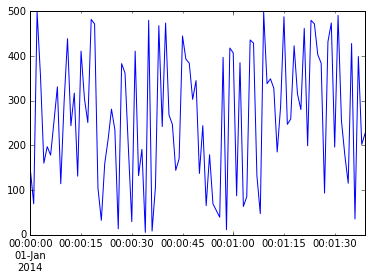

In [77]:
ts.plot()

In [78]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

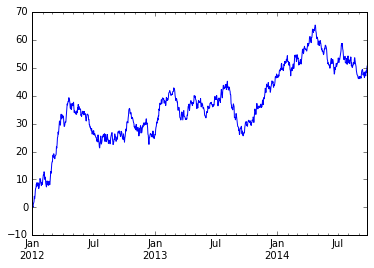

In [79]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [80]:
# Pandas plot function will print with labels as default

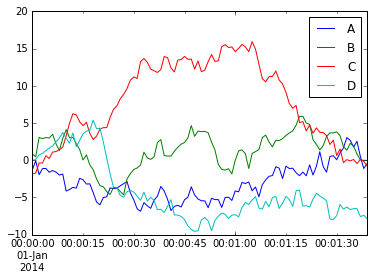

In [81]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas